In [2]:
from util import go_to_project_root
go_to_project_root()

CWD cambiado a la raíz del proyecto: /home/epsilon/Documents/doctorado/S2/ENSTA630/tareas/HW2


# Problema 1e

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from source.fit.inference.test_chow import test_chow

from source.data.loaders import create_dataset
from source.models.var import VAR
from source.data.transform import create_var_dataset
from source.display.hw import hw2 as plots
from source.display.hw.hw1 import save_figure


%load_ext autoreload
%autoreload 2

### Cargar datos

In [4]:
path = './data/base_25.xls'
dataset = create_dataset(path, problem=5)

[INFO] ¡Datos cargados exitosamente!


In [5]:
i_reshaped = dataset['i'][12:]
X = np.vstack([dataset['pi'], dataset['y'], i_reshaped]).T
X = np.vstack([dataset['pi'], dataset['y'], i_reshaped]).T

### Modelo

In [9]:
p = 2          # rezagos
n = X.shape[1] # numero de variables
model = VAR(inp_dim=n, 
            c=0,
            p=p)
model._is_stationary()
err = model.fit(X)
model._is_stationary()

print(model)



         Vector Autoregression (VAR) Model Summary          
VAR(p=2, n=3)
Estacionario: Sí (Max Eigenvalue: 0.9644)
------------------------------------------------------------
                 Propiedades de Largo Plazo                 
Media Incondicional:
[0.0396 0.0271 0.0439]

D.E. Incondicional:
[0.0244 0.0468 0.0253]
------------------------------------------------------------
                  Coeficientes del Modelo                   
Intercepto (c):
[ 0.0017  0.0099 -0.0004]

Matriz Phi_1:(3, 3)
Matriz Phi_2:(3, 3)
------------------------------------------------------------
          Matriz de Covarianza de Residuos (Omega)          
Omega: (3, 3)



# Pregunta e: IRF ORTOGONALIZADA

In [10]:
# Obtenemos los valores de la IRF ortogonalizada para un horizonte de 100
girf_resultados = model.get_irf(H=100, method='girf')
girf_resultados.shape


(101, 3, 3)

✅ Figura guardada exitosamente en ./presentation/figures/hw2/p1e/impulso_respuesta.pdf


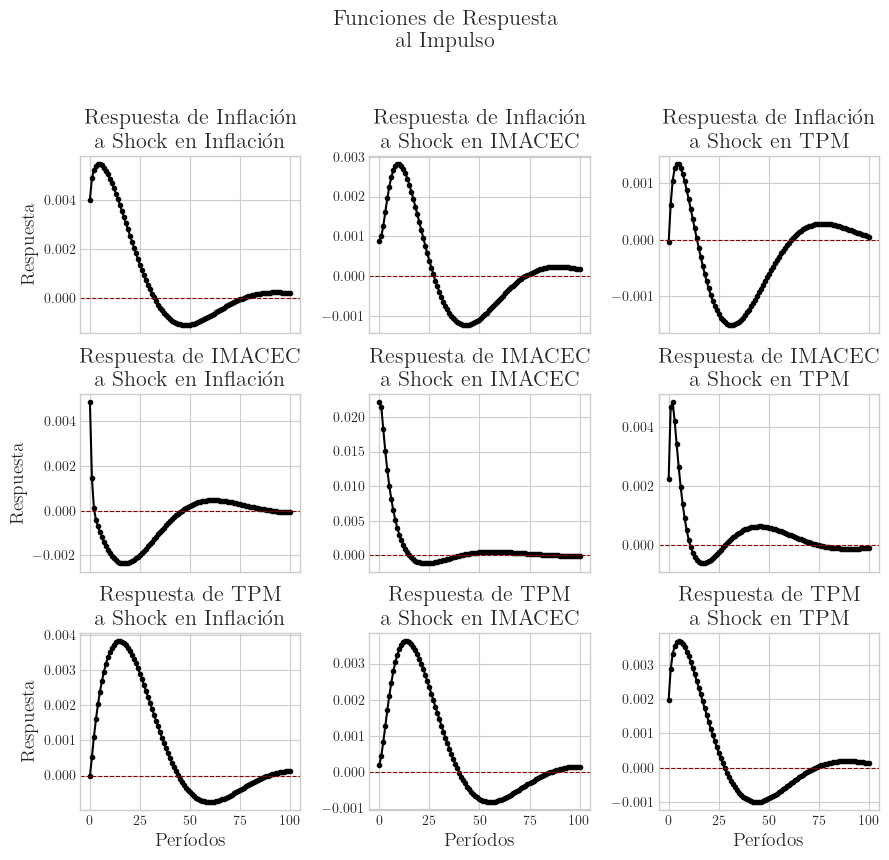

In [12]:
# Gráfico IRF ORTOGONALIZADO
def plot_with_user_style(girf_results, variable_names):
    """
    Grafica la matriz de GIRF utilizando la estructura de bucles y
    títulos proporcionada por el usuario.
    """
    # 1. Obtener dimensiones
    horizonte, k, _ = girf_results.shape
    
    # 2. Crear la cuadrícula de gráficos (código proporcionado)
    fig, axes = plt.subplots(k, k, figsize=(10, 8), sharex=True)
    fig.suptitle('Funciones de Respuesta al Impulso', fontsize=16)

    # 3. Iterar para llenar cada subgráfico
    for j in range(k):  # Columna: Shock en la variable j
        for i in range(k):  # Fila: Respuesta de la variable i
            # Se extrae la respuesta de la variable 'i' al shock en la variable 'j'
            # del array 3D estándar.
            response = girf_results[:, i, j]
            
            ax = axes[i, j]
            ax.plot(range(horizonte), response, marker='.', linestyle='-')
            ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
            
            # Usamos los nombres de las variables en lugar de los genéricos
            ax.set_title(f'Respuesta de {variable_names[i]} a Shock en {variable_names[j]}', fontsize=9)
            
            # Etiquetas solo en los bordes para mayor claridad
            if i == k - 1:
                ax.set_xlabel('Períodos')
            if j == 0:
                ax.set_ylabel('Respuesta')

    # 4. Ajustar y mostrar el gráfico
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.show()

# 2. Nombres de las variables
nombres = ['Inflación', 'IMACEC', 'TPM']


fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True)
fig, axes = plots.plot_with_user_style(girf_resultados, nombres, fig=fig, axes=axes)
save_figure(fig, './presentation/figures/hw2/p1e/impulso_respuesta.pdf')
plt.show()